Import MongoDB Connection String

In [37]:
import json

with open('C:\\Users\\webbr\\OneDrive\\Documents\\GitHub\\Secrets.json', 'r') as pw:
    data = json.load(pw)

    key = data["examplemongodb"]


print(f"My string is {len(key)} characters long")

My string is 72 characters long


Connect to MongoDB

In [41]:
import pymongo
import certifi

ConnectionString = data["examplemongodb"]

client = pymongo.MongoClient(ConnectionString, tlsCAFile=certifi.where())

DA320Database = client["MovieDatabase"]

AllCollections = DA320Database.list_collection_names()

print(f"Using MongoDB version {client.server_info()['version']}")
print(f"This Database has the collections {AllCollections}")

Using MongoDB version 6.0.5
This Database has the collections ['MetaCritic', 'IMDB']


Import IMDB Information

In [42]:
import pandas as pd

cursor = DA320Database["IMDB"].find()

IMDB = pd.DataFrame(cursor)

IMDB.head()

,_id,id,title,runtime,user_rating,votes,mpaa_rating,release_date,budget,opening_weekend,gross_sales,genres,cast,director,producer,company
0,6456edd6d293f26c2693b42d,77327,"China 9, Liberty 37",102.0,6.0,1212,R,8/4/1978,NaN,NaN,NaN,"Romance, Western","Warren Oates, Fabio Testi, Jenny Agutter, Sam ...","Monte Hellman, Tony Brandt","Gianni Bozzacchi, Valerio De Paolis, Rolf M. D...","Aspa Producciones, Compagnia Europea Cinematog..."
1,6456edd6d293f26c2693b434,77402,Dawn of the Dead,127.0,7.8,119275,Unrated,9/1/1978,650000.0,NaN,55000000.0,"Horror, Thriller","David Emge, Ken Foree, Scott H. Reiniger, Gayl...",George A. Romero,"Claudio Argento, Dario Argento, Billy 'Silver ...","Laurel Group, Dawn Associates"
2,6456edd6d293f26c2693b435,77928,Midnight Express,121.0,7.5,79089,R,5/18/1978,2700000.0,NaN,NaN,"Biography, Crime, Drama, Thriller","Brad Davis, Irene Miracle, Bo Hopkins, Paolo B...",Alan Parker,"Peter Guber, Alan Marshall, David Puttnam","Columbia Pictures, Casablanca Filmworks"
3,6456edd6d293f26c2693b438,77269,The Boys from Brazil,125.0,7.0,27910,R,8/19/1978,12000000.0,NaN,NaN,"Drama, Mystery, Sci-Fi, Thriller","Gregory Peck, Laurence Olivier, James Mason, L...",Franklin J. Schaffner,"Robert Fryer, Stanley O'Toole, Martin Richards","Sir Lew Grade, Producers Circle, ITC Films"
4,6456edd6d293f26c2693b439,77405,Days of Heaven,94.0,7.8,57676,PG,9/13/1978,3000000.0,NaN,NaN,"Drama, Romance","Richard Gere, Brooke Adams, Sam Shepard, Linda...",Terrence Malick,"Jacob Brackman, Bert Schneider, Harold Schneider",Paramount Pictures


Cleanse and Transform the Data

In [43]:
IMDB.release_date = pd.to_datetime(IMDB.release_date, errors="coerce")
IMDB.budget = pd.to_numeric(IMDB.budget, errors="coerce")
IMDB.runtime = pd.to_numeric(IMDB.runtime, errors="coerce")

Create Charts for Runtime and Budget

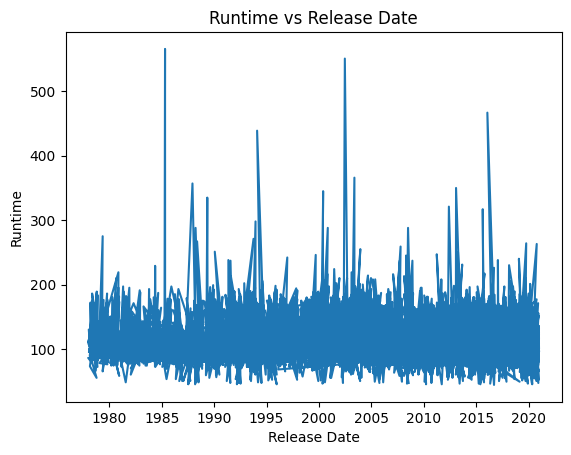

In [49]:
import matplotlib.pyplot as plot

plot.plot(IMDB["release_date"], IMDB["runtime"])
plot.xlabel("Release Date")
plot.ylabel("Runtime")
plot.title("Runtime vs Release Date")
plot.show()


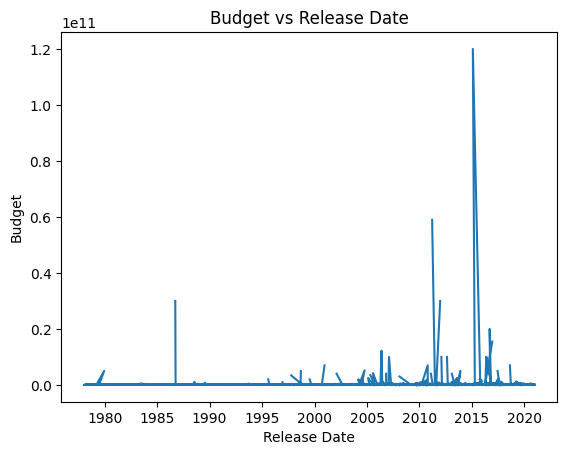

In [50]:
import matplotlib.pyplot as plot

plot.plot(IMDB["release_date"], IMDB["budget"])
plot.xlabel("Release Date")
plot.ylabel("Budget")
plot.title("Budget vs Release Date")
plot.show()


Find Outliers From Runtime and Budget

In [78]:
import pandas as pd

query = {"runtime": { "$gt": (300) } }

cursor = DA320Database[IMDB].find(query)

IMDB = pd.DataFrame(cursor)

IMDB.head()

TypeError: name must be an instance of str